# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
requests.get(btc_url)
response_btc_data = requests.get(btc_url)
current_btc_price = response_btc_data.content

# Convert data to json format
import json
current_btc_price = response_btc_data.json()
print(json.dumps(current_btc_price, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18889606,
            "total_supply": 18889606,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 56491.0,
                    "volume_24h": 34870004197,
                    "market_cap": 1063191158631,
                    "percentage_change_1h": 0.42973389887521,
                    "percentage_change_24h": -0.0311241854124715,
                    "percentage_change_7d": -4.08662405902513,
                    "percent_change_1h": 0.42973389887521,
                    "percent_change_24h": -0.0311241854124715,
                    "percent_change_7d": -4.08662405902513
                },
                "CAD": {
                    "price": 72421.462,
                    "volume_24h": 44703345380.554,
                  

In [6]:
# Current BTC price
current_btc_price = current_btc_price['data']['1']['quotes']['USD']['price']
print(current_btc_price)

56491.0


In [7]:
# Fetch current ETH price
requests.get(eth_url)
response_eth_data = requests.get(eth_url)
current_eth_price = response_eth_data.content

# Convert data to json format
current_eth_price = response_eth_data.json()
print(json.dumps(current_eth_price, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118584527,
            "total_supply": 118584527,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 4510.84,
                    "volume_24h": 20441104883,
                    "market_cap": 533606205742,
                    "percentage_change_1h": 0.386136918703767,
                    "percentage_change_24h": -0.216801135707139,
                    "percentage_change_7d": -0.11087869057316,
                    "percent_change_1h": 0.386136918703767,
                    "percent_change_24h": -0.216801135707139,
                    "percent_change_7d": -0.11087869057316
                },
                "CAD": {
                    "price": 5782.89688,
                    "volume_24h": 26205496460.006,
               

In [8]:
# Current ETH price
current_eth_price = current_eth_price['data']['1027']['quotes']['USD']['price']
print(current_eth_price)

4510.84


In [9]:
# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

In [10]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $67789.20
The current value of your 5.3 ETH is $23907.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Verify key type
# Create the Alpaca API object
print(f"Alpaca key type: {type(alpaca_api_key)}")
print(f"Alpaca secret key type: {type(alpaca_secret_key)}")

Alpaca key type: <class 'str'>
Alpaca secret key type: <class 'str'>


In [13]:
# Create the Alpaca API object
# Create the Alpaca API object - Function 'Rest'
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2021-11-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
prices

AGG                                      SPY  \
                             open      high    low    close    volume open   
time                                                                         
2021-11-30 00:00:00-05:00  114.87  115.1074  114.5  114.765  10624796  462   

                                                             
                             high    low   close     volume  
time                                                         
2021-11-30 00:00:00-05:00  464.03  455.3  455.78  126381409

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(prices['AGG']['close'])
spy_close_price = float(prices['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.765
Current SPY closing price: $455.78


In [16]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22789.00
The current value of your 200 AGG shares is $22953.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Calculate my total crypto assets and shares
my_total_crypto = my_btc_value + my_eth_value
my_total_shares = my_agg_value + my_spy_value

# Set the data for the shares value DataFrame
value_data = {
    "amount":[my_total_crypto, my_total_shares]
} 


# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index =['crypto', 'shares'])
display(df_savings)

# Display savings DataFrame
display(df_savings)

,amount
crypto,91696.652
shares,45742.000


,amount
crypto,91696.652
shares,45742.000


<AxesSubplot:ylabel='amount'>

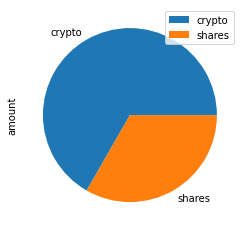

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_total_crypto + my_total_shares
print(f"Your total amount of saving is ${total_savings:0.2f}")

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! you have enough money in your emergency fund")
    
elif total_savings == emergency_fund:
    print(f"Congratulations! you have reached your financial goal")
    
else:
    print(f"Sorry! you are still missing ${total_savings - emergency_fund:0.2f} away from your financial goal")

Your total amount of saving is $137438.65
Congratulations! you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-30', tz='America/New_York').isoformat()

In [21]:
# Set timeframe to 1D
timeframe = "1D"

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-07-12 00:00:00-04:00  115.80  115.805  115.6000  115.63  3184908  435.42   
2021-07-13 00:00:00-04:00  115.65  115.760  115.3022  115.39  4698374  436.26   
2021-07-14 00:00:00-04:00  115.59  115.760  115.5690  115.75  3907266  437.39   
2021-07-15 00:00:00-04:00  115.94  116.020  115.7222  115.99  3675913  434.81   
2021-07-16 00:00:00-04:00  115.77  115.960  115.7600  115.90  3679747  436.00   

                                                             
                             high     low   close    volume  
time                                                         
2021-07-12 00:00:00-04:00  437.35  434.97  437.08  42031814  
2021-07-13 00:00:00-04:00  437.84  435.31  435.62  45923305  
2021-07-14 00:00:00-04:00  437.92  434.91  436.22  54445950  
2021-07-15 00:00:00-04:00  435.53  432.72  434.73  50376465  
2021-07-16 00:00:00-04:00  436.06  430.92  431.38  66637403

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2021-07-12 00:00:00-04:00  115.80  115.805  115.6000  115.63  3184908   
2021-07-13 00:00:00-04:00  115.65  115.760  115.3022  115.39  4698374   
2021-07-14 00:00:00-04:00  115.59  115.760  115.5690  115.75  3907266   
2021-07-15 00:00:00-04:00  115.94  116.020  115.7222  115.99  3675913   
2021-07-16 00:00:00-04:00  115.77  115.960  115.7600  115.90  3679747   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-07-12 00:00:00-04:00          NaN  435.42  437.35  434.97  437.08   
2021-07-13 00:00:00-04:00    -0.002076  436.26  437.84  435.31  435.62   
2021-07-14 00:00:00-04:00     0.003120  437.39  437.92  434.91  436.22   
2021-07-15 00:00:00-04:00     0.002073  434.81  435.53  432.72  434.73   
2021-07-16 00:00:00-04:00    -0.000776  436.00  436.06  430.92  431.38   

                                                  
                             volume daily_return  
time                                              
2021-07-12 00:00:00-04:00  42031814          NaN  
2021-07-13 00:00:00-04:00  45923305    -0.003340  
2021-07-14 00:00:00-04:00  54445950     0.001377  
2021-07-15 00:00:00-04:00  50376465    -0.003416  
2021-07-16 00:00:00-04:00  66637403    -0.007706

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998846,0.998789,0.995180,1.007561,1.005207,1.001538,0.998773,0.997963,0.996877,1.000438,...,0.999727,0.997769,1.003639,0.999956,0.998850,1.008901,0.996674,1.003871,0.999206,1.002942
2,1.000617,0.999254,0.992222,1.007155,0.998439,1.005122,0.997907,0.993751,1.002141,0.999968,...,1.000417,0.999682,1.008721,1.004875,1.003321,1.003813,1.002202,0.997238,0.999530,0.997941
3,1.002233,0.996307,0.999469,1.003953,0.991507,1.002956,0.997733,0.989740,1.003898,0.999584,...,0.997038,1.003430,1.013788,1.006928,1.001466,0.998990,0.995642,0.995071,0.999272,0.992861
4,1.002193,0.996752,0.995455,1.013932,0.986240,1.002970,0.986961,0.989403,1.001158,1.005184,...,0.995475,0.997978,1.013696,1.008739,0.994624,0.995169,0.991970,0.990147,0.996692,0.995957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.304953,11.808007,5.587115,7.200667,5.169739,5.943418,2.757836,11.682761,3.338447,6.232347,...,4.284137,9.316437,5.330725,8.768854,4.408236,5.689288,7.918291,4.919318,9.987400,3.944186
7557,7.325276,11.854374,5.583527,7.143460,5.159258,5.917961,2.749567,11.641049,3.345401,6.271726,...,4.268391,9.252120,5.334415,8.783627,4.427959,5.748463,7.875209,4.926835,10.019405,3.933332
7558,7.311156,11.803468,5.630994,7.164438,5.149718,5.931757,2.769233,11.745131,3.362051,6.299025,...,4.253211,9.232297,5.337782,8.753065,4.430096,5.746139,7.868876,4.938418,9.985787,3.900826
7559,7.252468,11.841589,5.696046,7.145697,5.150299,5.933458,2.771229,11.745036,3.361440,6.244359,...,4.246096,9.266704,5.299591,8.736826,4.438197,5.754605,7.872774,4.921982,9.935030,3.927032


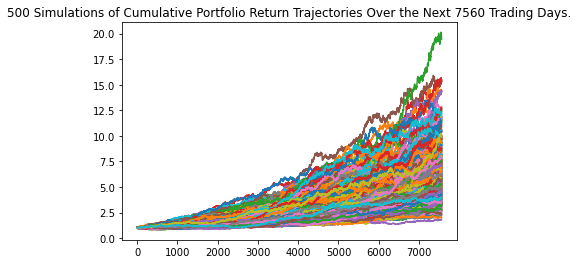

In [26]:
# Plot simulation outcomes
line_plot = MC_30_years.plot_simulation()

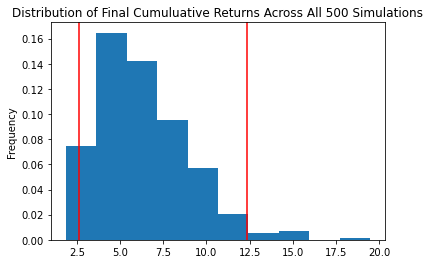

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")